
# Inversión en ciencia en Europa

<br>

<img src="http://www.imperial.ac.uk/ImageCropToolT4/imageTool/uploaded-images/shutterstock_292800188--tojpeg_1436282518366_x2.jpg">

<br>


# Conectar con mi Web GIS

In [1]:
from IPython.display import display
from arcgis.gis import GIS

gis = GIS("https://desarrollogis.maps.arcgis.com", "expertoAdmin")

Enter password: ········


In [2]:
#
# Estos son los parámetros que requiere Eurostat para consultar información
# Puede comprobarse en la web: http://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder
#
eurostat_url_service = 'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/'
id_dataset = 'rd_e_gerdtot'
precision = '1'
sectperf = 'GOV'
unit = 'EUR_HAB'
time = '2015'
geoLevel = 'country'
groupedIndicators = '1'
unitLabel = 'label'

In [3]:
#
# Para lanzar la consulta al Eurostat utilizaremos request
# y formaremos la URL que nos indica el QueryBuilder del Eurostat
#
import requests

eurostat_query = eurostat_url_service+id_dataset+'?precision='+precision+'&sectperf=' \
                    +sectperf+'&time='+time+'&unit='+unit+'&geoLevel='+geoLevel+'&groupedIndicators=' \
                    +groupedIndicators+'&unitLabel='+unitLabel

response = requests.get(eurostat_query)
response

<Response [200]>

# Los científicos de datos y la gestión de formatos mediante Python

In [4]:
#
# La respuesta del Eurostat la recogemos como texto pero es un JSON, lo transformamos utilizando la librería json
#
import json

datosEurostat = json.loads(response.text)
datosEurostat

# Si tuvieramos la respuesta en un fichero, sería igualmente muy fácil de leer:
#          json_file = open(r"C:\eurostat.json")
#          datosEurostat = json.load(json_file)

{'class': 'dataset',
 'dimension': {'geo': {'category': {'index': {'AT': 0,
     'BA': 1,
     'BE': 2,
     'BG': 3,
     'CH': 4,
     'CY': 5,
     'CZ': 6,
     'DE': 7,
     'DK': 8,
     'EA19': 9,
     'EE': 10,
     'EL': 11,
     'ES': 12,
     'EU28': 13,
     'FI': 14,
     'FR': 15,
     'HR': 16,
     'HU': 17,
     'IE': 18,
     'IS': 19,
     'IT': 20,
     'JP': 21,
     'KR': 22,
     'LT': 23,
     'LU': 24,
     'LV': 25,
     'ME': 26,
     'MK': 27,
     'MT': 28,
     'NL': 29,
     'NO': 30,
     'PL': 31,
     'PT': 32,
     'RO': 33,
     'RS': 34,
     'RU': 35,
     'SE': 36,
     'SI': 37,
     'SK': 38,
     'TR': 39,
     'UK': 40,
     'US': 41},
    'label': {'AT': 'Austria',
     'BA': 'Bosnia and Herzegovina',
     'BE': 'Belgium',
     'BG': 'Bulgaria',
     'CH': 'Switzerland',
     'CY': 'Cyprus',
     'CZ': 'Czech Republic',
     'DE': 'Germany (until 1990 former territory of the FRG)',
     'DK': 'Denmark',
     'EA19': 'Euro area (19 countries)'

In [5]:
#
# Tras analizar en profundidad el JSON, somos capaces de ordenar la información de los países 
#
countries = {}
for label in datosEurostat['dimension']['geo']['category']['label']:
    for index in datosEurostat['dimension']['geo']['category']['index']:
        if label == index:
            countries[datosEurostat['dimension']['geo']['category']['index'][index]] = datosEurostat['dimension']['geo']['category']['label'][label].split()[0]
            break

#
# Y de esta información vamos a sacar una relación país-valor simplificada
#
valores = []
for dataId in datosEurostat['value']:
    for countryId in countries:
        if dataId == str(countryId):
            valor = {}
            valor['Pais'] = countries[countryId]
            valor['Valor'] = datosEurostat['value'][dataId]
            valores.append(valor)
            break
valores

[{'Pais': 'Austria', 'Valor': 56.1},
 {'Pais': 'Belgium', 'Valor': 82.7},
 {'Pais': 'Bulgaria', 'Valor': 12.5},
 {'Pais': 'Switzerland', 'Valor': 22},
 {'Pais': 'Cyprus', 'Valor': 13.1},
 {'Pais': 'Czech', 'Valor': 62.9},
 {'Pais': 'Germany', 'Valor': 153.8},
 {'Pais': 'Denmark', 'Valor': 32.9},
 {'Pais': 'Euro', 'Valor': 86.6},
 {'Pais': 'Estonia', 'Valor': 24.9},
 {'Pais': 'Greece', 'Valor': 44.1},
 {'Pais': 'Spain', 'Valor': 54.3},
 {'Pais': 'European', 'Valor': 69.4},
 {'Pais': 'Finland', 'Valor': 90.7},
 {'Pais': 'France', 'Valor': 95.6},
 {'Pais': 'Croatia', 'Valor': 21.8},
 {'Pais': 'Hungary', 'Valor': 20.4},
 {'Pais': 'Ireland', 'Valor': 29.4},
 {'Pais': 'Iceland', 'Valor': 48.7},
 {'Pais': 'Italy', 'Valor': 47.9},
 {'Pais': 'Japan', 'Valor': 80.8},
 {'Pais': 'South', 'Valor': 121.8},
 {'Pais': 'Lithuania', 'Valor': 22.8},
 {'Pais': 'Luxembourg', 'Valor': 350.6},
 {'Pais': 'Latvia', 'Valor': 19.6},
 {'Pais': 'Montenegro', 'Valor': 4.2},
 {'Pais': 'Former', 'Valor': 2.7},
 {'Pai

# Pandas!

In [6]:
#
# Analizaremos pandas más adelante pero nos permite trabajar con arrays multidimensionales de forma sencilla
#
import pandas as pd

# En este caso, vamos a convertir nuestra relación pais-valor en una tabla bidimensional
df = pd.DataFrame(valores)
fc = gis.content.import_data(df, {'CountryCode': 'pais'})
df

,Pais,Valor
0,Austria,56.1
1,Belgium,82.7
2,Bulgaria,12.5
3,Switzerland,22.0
4,Cyprus,13.1
5,Czech,62.9
6,Germany,153.8
7,Denmark,32.9
8,Euro,86.6
9,Estonia,24.9


# Salvar los datos en mi organización

In [ ]:
#
# Si queremos, podemos salvar estos datos que en origen estaban en el Eurostat ahora en nuestra organización
#
item_properties = {
    "title": "Inversión de cada gobierno en ciencia",
    "tags" : "ciencia, gobierno, eurostat",
    "text": json.dumps({"featureCollection": {"layers": [dict(fc.layer)]}}),
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer"
}

item = gis.content.add(item_properties)

# Visualizando la información final

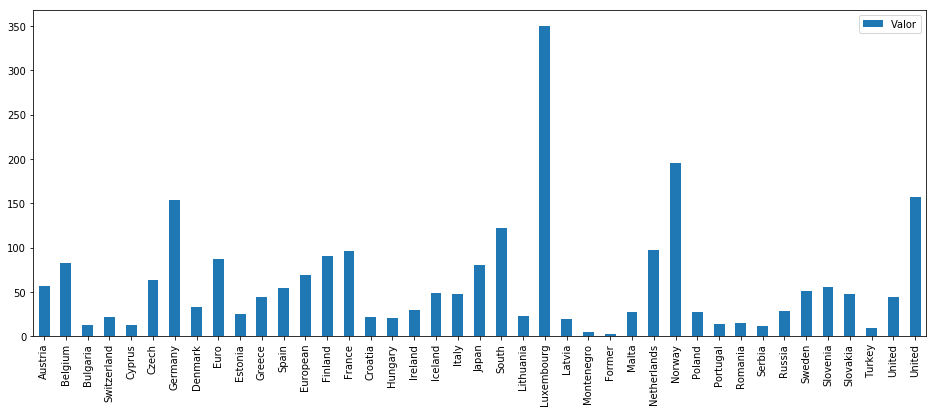

In [14]:
#
# MatPlotLib es una librería de renderizado gráfico que se realaciona fenomenal con Pandas y con Jupyter
#
%matplotlib inline
ax = df.plot(figsize=(16,6), kind="bar")
ax.set_xticks(df.index)
ax.set_xticklabels(df.Pais, rotation=90)
ax

In [15]:
# 
# Además, de en forma de gráfica, podemos trabajar, por supuesto, en forma de mapa mejorando la visualización de la información
# 
map = gis.map("Europe")
map.add_layer(fc, {"renderer":"ClassedSizeRenderer", "field_name":"Valor"})
map.basemap = "dark-gray"
map

Geocoder does not support single line address input


In [16]:
import os
os.getcwd()

'C:\\PythonAPI\\Taller\\Experto'